Блокнот к статье [Сколько времени валюты проводят в трендах](https://empirix.ru/skolko-valyuty-provodyat-v-trendah/)

# Trend vs. Flat

In [ ]:
# !pip install matplotlib
# !pip install pandas
# !pip install yfinance

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

## Ticker from finance.yahoo.com

In [2]:
ticker = "GBPUSD=X"
date_from = '2018-01-01'
date_to = pd.Timestamp.today().date()
# # Or select custom date
# date_to = '2022-09-23'

df = yf.download(ticker, start=date_from, end=date_to, progress=False)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,1.351607,1.351607,1.348199,1.351607,1.351607,0
2018-01-02,1.351114,1.359675,1.350931,1.351132,1.351132,0
2018-01-03,1.359453,1.361470,1.349874,1.359619,1.359619,0
2018-01-04,1.351169,1.356116,1.350658,1.351132,1.351132,0
2018-01-05,1.355381,1.358031,1.352667,1.355289,1.355289,0
...,...,...,...,...,...,...
2024-03-18,1.273188,1.274860,1.272265,1.273139,1.273139,0
2024-03-19,1.272718,1.272912,1.266978,1.272718,1.272718,0
2024-03-20,1.271779,1.273010,1.268504,1.271941,1.271941,0


In [3]:
# Update DF by removing redundant columns
df = df['Close'].to_frame()
# Remove time portion from index
# df.index = df.index.date

df

,Close
Date,
2018-01-01,1.351607
2018-01-02,1.351132
2018-01-03,1.359619
2018-01-04,1.351132
2018-01-05,1.355289
...,...
2024-03-18,1.273139
2024-03-19,1.272718
2024-03-20,1.271941


In [5]:
# Simple moving average - 3
sma_1 = 20

mult = 1.75

sma_2 = int(sma_1 * mult)
sma_3 = int(sma_2 * mult)

print(sma_1, sma_2, sma_3)

20 35 61


## Dataframe, 3 SMAs

In [6]:
# Calculate SMA using .rolling(window).mean()
for sma in [sma_1, sma_2, sma_3]:
    df[f'SMA{sma}'] = df['Close'].rolling(sma).mean()

# Remove null values
df.dropna(inplace=True)

df.head()

,Close,SMA20,SMA35,SMA61
Date,,,,
2018-03-26,1.414767,1.393447,1.394141,1.389589
2018-03-27,1.423893,1.394809,1.394984,1.390774
2018-03-28,1.417635,1.396160,1.395606,1.391864
2018-03-29,1.408034,1.397791,1.396180,1.392658
2018-03-30,1.402938,1.399061,1.396450,1.393507


## Plot chart

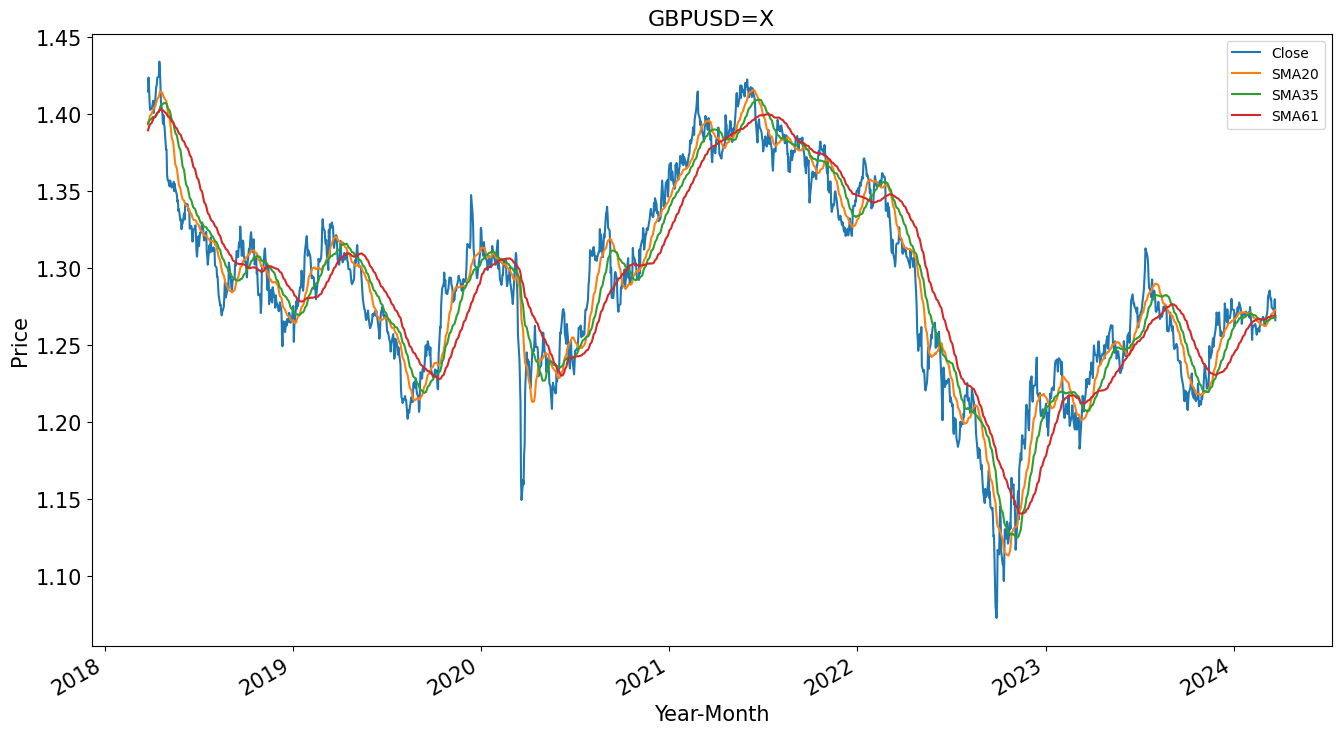

In [7]:
df[['Close',
    f'SMA{sma_1}', 
    f'SMA{sma_2}', 
    f'SMA{sma_3}']].plot(label=ticker, figsize=(16, 9))

# Set the title and axis label
plt.title(ticker, fontsize=16)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

### Plot a subset for more visibility

In [8]:
# Make a smaller subset
sub_date_from = pd.to_datetime('2019-01-01')
sub_date_to = pd.to_datetime('2019-12-31')

df_sub = df.loc[(pd.to_datetime(df.index) >= sub_date_from)
                & (pd.to_datetime(df.index) <= sub_date_to)]
df_sub.tail()

,Close,SMA20,SMA35,SMA61
Date,,,,
2019-12-25,1.293494,1.308969,1.299810,1.286347
2019-12-26,1.297353,1.309187,1.300143,1.287464
2019-12-27,1.300221,1.309634,1.300778,1.288608
2019-12-30,1.309192,1.310529,1.301622,1.289837
2019-12-31,1.311303,1.311391,1.302350,1.291113


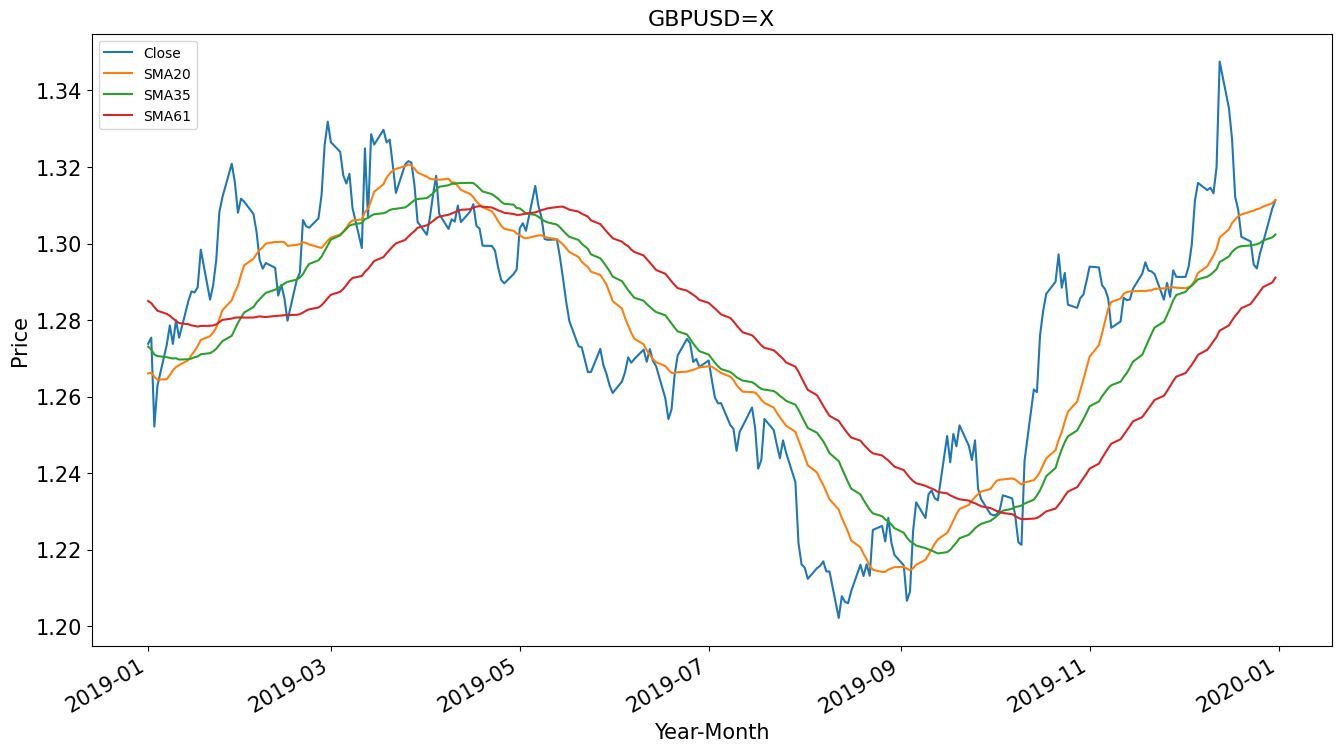

In [9]:
df_sub[['Close',
    f'SMA{sma_1}', 
    f'SMA{sma_2}', 
    f'SMA{sma_3}']].plot(label=ticker, figsize=(16, 9))

# Set the title and axis label
plt.title(ticker, fontsize=16)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

## Calculations: trend vs. flat

In [10]:
# Calculate states: trend (up, down) of flat
df['uptrend'] = (
    ((df[f'SMA{sma_1}'] > df[f'SMA{sma_2}']) 
     & (df[f'SMA{sma_2}'] > df[f'SMA{sma_3}']))).astype(int)

df['downtrend'] = (
    ((df[f'SMA{sma_1}'] < df[f'SMA{sma_2}'])          
     & (df[f'SMA{sma_2}'] < df[f'SMA{sma_3}']))).astype(int)

df['flat'] = ((df['uptrend'] == 0) & (df['downtrend'] == 0)).astype(int)
df[470:477]

,Close,SMA20,SMA35,SMA61,uptrend,downtrend,flat
Date,,,,,,,
2020-01-14,1.298819,1.307658,1.308783,1.300131,0,0,1
2020-01-15,1.302253,1.307160,1.309245,1.300214,0,0,1
2020-01-16,1.304121,1.306929,1.309563,1.300471,0,0,1
2020-01-17,1.307873,1.307236,1.310037,1.300726,0,0,1
2020-01-20,1.300728,1.307245,1.310306,1.301000,0,0,1
2020-01-21,1.300559,1.307548,1.310492,1.301284,0,0,1
2020-01-22,1.304802,1.308113,1.310635,1.301597,0,0,1


In [11]:
# % of time in each state
uptr = df['uptrend'].sum() / len(df)
dntr = df['downtrend'].sum() / len(df)
flat = df['flat'].sum() / len(df)

print(f"Uptrend: {uptr}\nDowntrend: {dntr}\nFlat: {flat}")

Uptrend: 0.329923273657289
Downtrend: 0.38618925831202044
Flat: 0.28388746803069054


## Trend vs. Flat pie chart

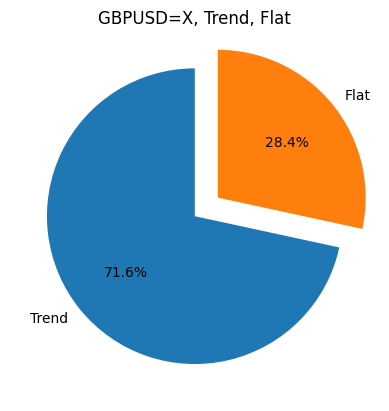

In [12]:
values = [uptr + dntr, flat]
labels = ["Trend", "Flat"]
myexplode = [0, 0.2]
plt.pie(values, labels=labels, startangle=90, explode=myexplode, 
        autopct="%1.1f%%")
plt.title(f"{ticker}, Trend, Flat")
plt.show()

<hr>

# Scan Tickers

In [13]:
def trend_flat(df_main, date_from, date_to, sma_1, sma_mult):
    df = df_main.copy(deep=True)
    """
    Take df, add smas, compute time in trend/flat.
    Return stats: smas list, time in trend, time in flat,
    date from, date to.
    """
    
    # Calculate SMA using .rolling(window).mean()
    sma_2 = int(sma_1 * sma_mult)
    sma_3 = int(sma_2 * sma_mult)
    for sma in [sma_1, sma_2, sma_3]:
        df[f'SMA{sma}'] = df['Close'].rolling(sma).mean()

    # Remove null values
    df.dropna(inplace=True)
    
    # Tag days as 1 or 0, spent in trend or flat
    df['uptrend'] = (
    ((df[f'SMA{sma_1}'] > df[f'SMA{sma_2}']) 
     & (df[f'SMA{sma_2}'] > df[f'SMA{sma_3}']))).astype(int)

    df['downtrend'] = (
        ((df[f'SMA{sma_1}'] < df[f'SMA{sma_2}'])          
         & (df[f'SMA{sma_2}'] < df[f'SMA{sma_3}']))).astype(int)

    df['flat'] = ((df['uptrend'] == 0) 
                  & (df['downtrend'] == 0)).astype(int)

    # % in each state
    uptr = df['uptrend'].sum() / len(df)
    dntr = df['downtrend'].sum() / len(df)
    flat = df['flat'].sum() / len(df)
    
    # Dates
    dt_from = df.index[0]
    dt_to = df.index[len(df)-1]
    
    return (f"{sma_1}_{sma_2}_{sma_3}",
            uptr + dntr, flat, dt_from, dt_to)

In [15]:
tickers = ["EURUSD=X", "GBPUSD=X", "AUDUSD=X", 
           "NZDUSD=X", "CAD=X", "JPY=X", 
           "EURJPY=X", "GBPJPY=X", "EURGBP=X"]

date_from = '2000-01-01'
date_to = '2024-03-23'
sma_mult = 1.75

smas = [5, 10, 20, 30, 50, 100, 150, 200]



TICKER: EURUSD=X
DATES: 2006-04-06 - 2024-03-22
TREND, AVERAGE: 69.35%


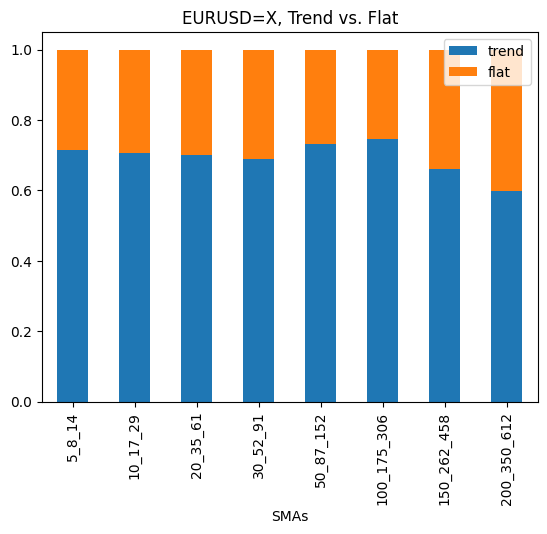



TICKER: GBPUSD=X
DATES: 2006-04-06 - 2024-03-22
TREND, AVERAGE: 67.98%


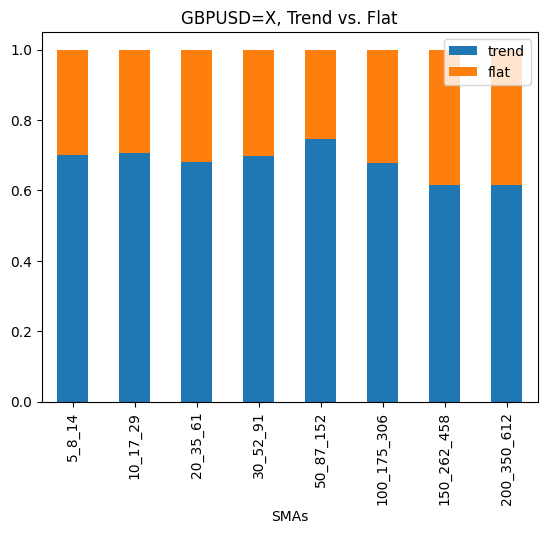



TICKER: AUDUSD=X
DATES: 2008-09-25 - 2024-03-22
TREND, AVERAGE: 71.47%


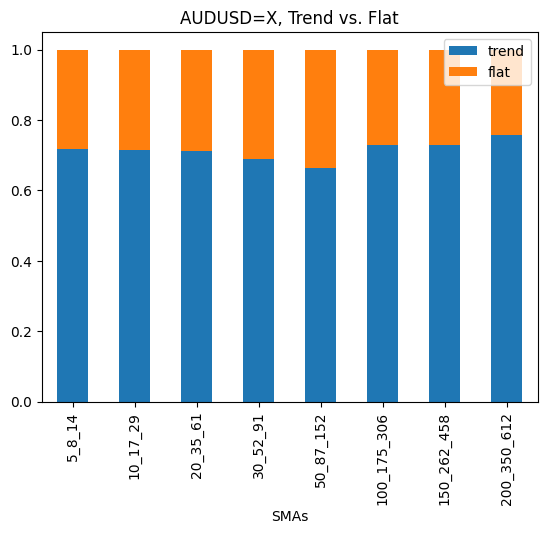



TICKER: NZDUSD=X
DATES: 2006-04-27 - 2024-03-22
TREND, AVERAGE: 69.83%


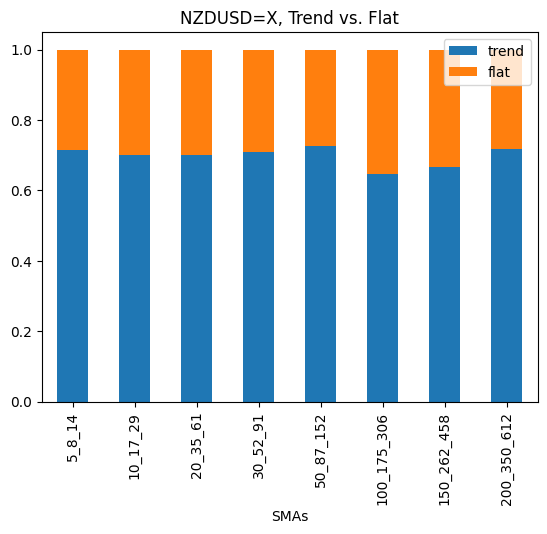



TICKER: CAD=X
DATES: 2006-01-23 - 2024-03-22
TREND, AVERAGE: 69.38%


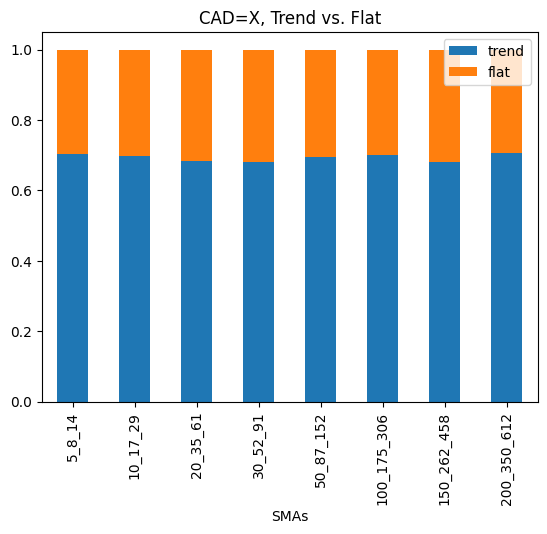



TICKER: JPY=X
DATES: 2002-05-07 - 2024-03-22
TREND, AVERAGE: 71.98%


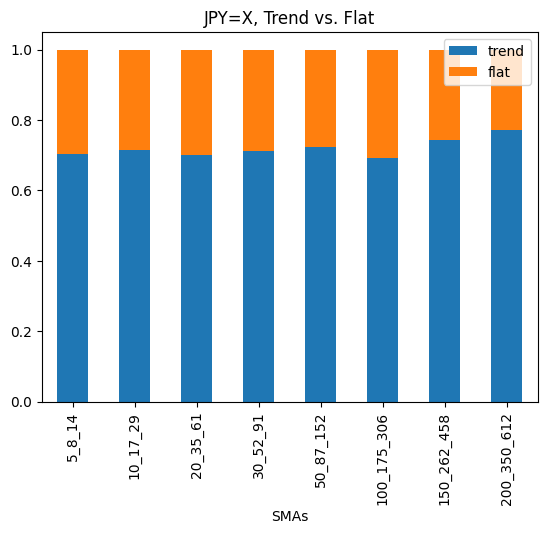



TICKER: EURJPY=X
DATES: 2005-05-30 - 2024-03-22
TREND, AVERAGE: 71.96%


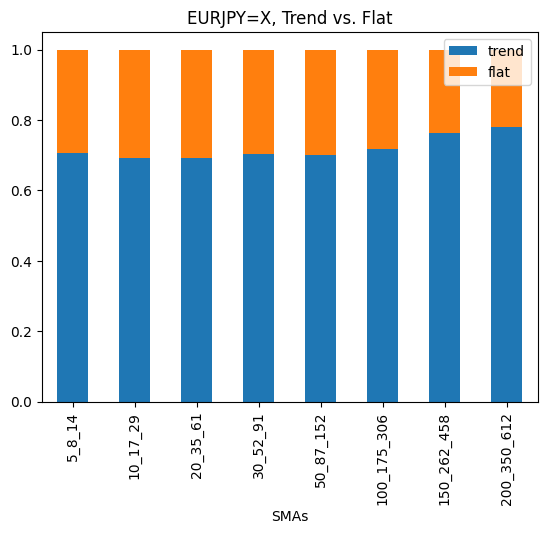



TICKER: GBPJPY=X
DATES: 2006-04-06 - 2024-03-22
TREND, AVERAGE: 73.61%


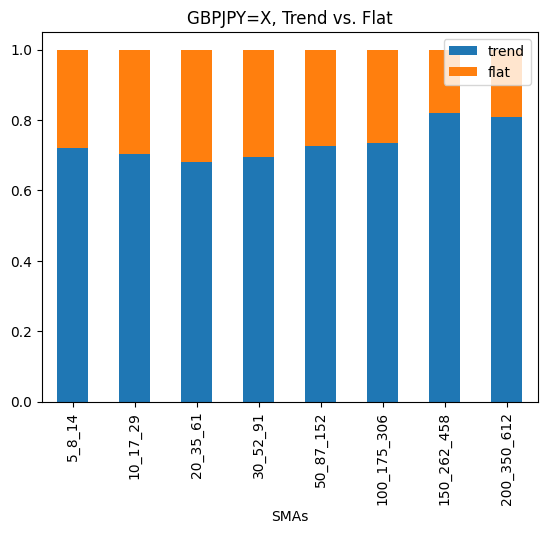



TICKER: EURGBP=X
DATES: 2002-05-07 - 2024-03-22
TREND, AVERAGE: 66.85%


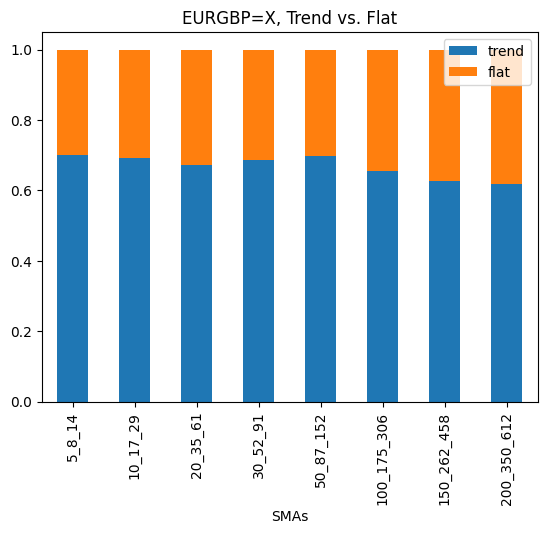

In [16]:
for ticker in tickers:
    # Download daily prices
    df = yf.download(ticker, start=date_from, end=date_to,
                     progress=False)

    # Update DF by removing redundant columns
    df = df['Close'].to_frame()

    # Remove time portion from index
    df.index = df.index.date
    
    result = {"SMAs": [], "trend": [], "flat": []}
    
    for i in smas:
        tr_fl = trend_flat(df, date_from, date_to, i, sma_mult)
        result["SMAs"].append(tr_fl[0])
        result["trend"].append(tr_fl[1])
        result["flat"].append(tr_fl[2])
        
    print(f'\n\nTICKER: {ticker}')
    print(f'DATES: {tr_fl[3]} - {tr_fl[4]}')
    time_in_trend = round(sum(result["trend"]) 
                          / len(result["trend"]) * 100, 2)
    print(f'TREND, AVERAGE: {time_in_trend}%')

    r_df = pd.DataFrame(result)
    r_df.plot.bar(x='SMAs', stacked=True)
    plt.title(f"{ticker}, Trend vs. Flat")
    plt.show()